In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf

In [34]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [35]:
print(len(train))
print(len(test))

2048
20480


In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2048 entries, 0 to 2047
Columns: 787 entries, id to 783
dtypes: int64(786), object(1)
memory usage: 12.3+ MB


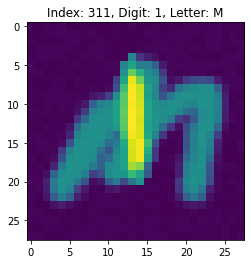

In [17]:
idx = 311
img = train.loc[idx, '0':].values.reshape(28, 28).astype(int)
digit = train.loc[idx, 'digit']
letter = train.loc[idx, 'letter']

plt.title('Index: %i, Digit: %s, Letter: %s'%(idx, digit, letter))
plt.imshow(img)
plt.show()

In [18]:
x_train = train.drop(['id', 'digit', 'letter'], axis=1).values
x_train = x_train.reshape(-1, 28, 28, 1)
x_train = x_train/255

y = train['digit']
y_train = np.zeros((len(y), len(y.unique())))
for i, digit in enumerate(y):
    y_train[i, digit] = 1

In [27]:
def create_cnn_model(x_train):
    inputs = tf.keras.layers.Input(x_train.shape[1:])
    
    bn = tf.keras.layers.BatchNormalization()(inputs)
    conv = tf.keras.layers.Conv2D(64, kernel_size=2, strides=1, padding='same', activation='relu')(bn)
    bn = tf.keras.layers.BatchNormalization()(conv)
    conv = tf.keras.layers.Conv2D(64, kernel_size=2, strides=1, padding='same', activation='relu')(bn)
    pool = tf.keras.layers.MaxPooling2D((2, 2))(conv)

    bn = tf.keras.layers.BatchNormalization()(pool)
    conv = tf.keras.layers.Conv2D(128, kernel_size=5, strides=1, padding='same', activation='relu')(bn)
    bn = tf.keras.layers.BatchNormalization()(conv)
    conv = tf.keras.layers.Conv2D(128, kernel_size=2, strides=1, padding='same', activation='relu')(bn)
    pool = tf.keras.layers.MaxPooling2D((2, 2))(conv)

    bn = tf.keras.layers.BatchNormalization()(pool)
    conv = tf.keras.layers.Conv2D(256, kernel_size=2, strides=1, padding='same', activation='relu')(bn)
    bn = tf.keras.layers.BatchNormalization()(conv)
    conv = tf.keras.layers.Conv2D(256, kernel_size=2, strides=1, padding='same', activation='relu')(bn)
    pool = tf.keras.layers.MaxPooling2D((2, 2))(conv)

    flatten = tf.keras.layers.Flatten()(pool)

    bn = tf.keras.layers.BatchNormalization()(flatten)
    dense = tf.keras.layers.Dense(1000, input_dim = 784,activation='relu')(bn) ## 은닉층 1000개, 입력값 784개, 렐루

    bn = tf.keras.layers.BatchNormalization()(dense)
    outputs = tf.keras.layers.Dense(10, activation='softmax')(bn) ## 출력 10개, 소프트맥스

    model = tf.keras.models.Model(inputs=inputs, outputs=outputs)

    return model

In [28]:
model = create_cnn_model(x_train)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
model.fit(x_train, y_train, epochs=18, batch_size = 10)

Train on 2048 samples
Epoch 1/18
2048/2048 [==============================] - 48s 23ms/sample - loss: 2.3493 - accuracy: 0.4062
Epoch 2/18
2048/2048 [==============================] - 46s 22ms/sample - loss: 1.1682 - accuracy: 0.6313
Epoch 3/18
2048/2048 [==============================] - 44s 22ms/sample - loss: 0.8503 - accuracy: 0.7285
Epoch 4/18
2048/2048 [==============================] - 45s 22ms/sample - loss: 0.6450 - accuracy: 0.7852
Epoch 5/18
2048/2048 [==============================] - 45s 22ms/sample - loss: 0.4628 - accuracy: 0.8496
Epoch 6/18
2048/2048 [==============================] - 45s 22ms/sample - loss: 0.3799 - accuracy: 0.8770
Epoch 7/18
2048/2048 [==============================] - 46s 23ms/sample - loss: 0.3630 - accuracy: 0.8818
Epoch 8/18
2048/2048 [==============================] - 45s 22ms/sample - loss: 0.2723 - accuracy: 0.9043
Epoch 9/18
2048/2048 [==============================] - 45s 22ms/sample - loss: 0.2203 - accuracy: 0.9194
Epoch 10/18
2048/2048 [=

In [42]:
x_test = test.drop(['id', 'letter'], axis=1).values
x_test = x_test.reshape(-1, 28, 28, 1)
x_test = x_test/255

submission = pd.read_csv('./submission.csv')
submission['digit'] = np.argmax(model.predict(x_test), axis=1)
submission.head()

,id,digit
0,2049,6
1,2050,3
2,2051,6
3,2052,0
4,2053,3


In [31]:
submission.to_csv('baseline.csv', index=False)